In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns

In [24]:
df = pd.read_csv("police.csv")

In [25]:
df.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [26]:
df.shape

(91741, 15)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               91741 non-null  object 
 1   stop_date           91741 non-null  object 
 2   stop_time           91741 non-null  object 
 3   county_name         0 non-null      float64
 4   driver_gender       86536 non-null  object 
 5   driver_race         86539 non-null  object 
 6   violation_raw       86539 non-null  object 
 7   violation           86539 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3307 non-null   object 
 10  stop_outcome        86539 non-null  object 
 11  is_arrested         86539 non-null  object 
 12  stop_duration       86539 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
 14  district            91741 non-null  object 
dtypes: bool(2), float64(1), object(12)
memory usage: 9.3+

In [28]:
df.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [29]:
import missingno as msn

<AxesSubplot:>

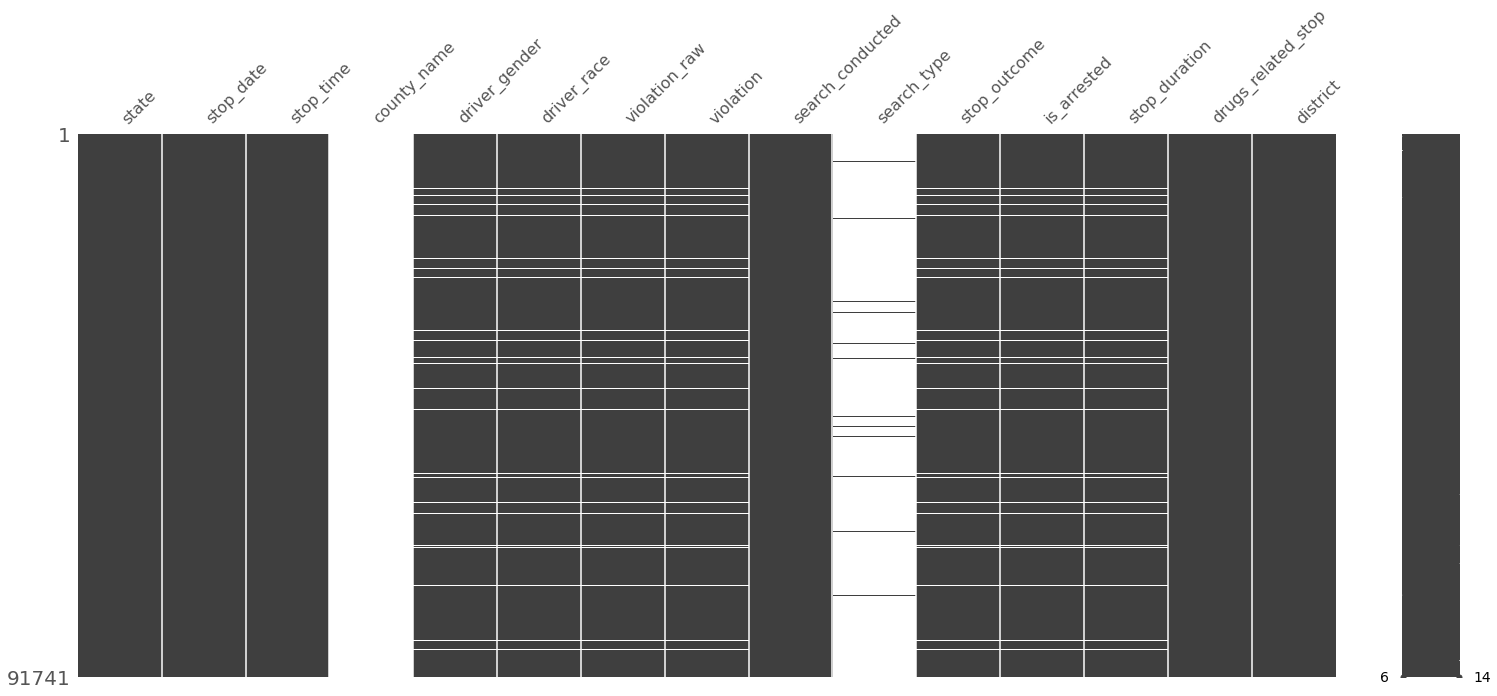

In [30]:
msn.matrix(df)

In [31]:
c=df.columns
c

Index(['state', 'stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type', 'stop_outcome', 'is_arrested', 'stop_duration',
       'drugs_related_stop', 'district'],
      dtype='object')

In [32]:
for i in c:
    print(i, "=====>", df[i].unique())
    print()

state =====> ['RI']

stop_date =====> ['2005-01-04' '2005-01-23' '2005-02-17' ... '2015-12-29' '2015-12-30'
 '2015-12-31']

stop_time =====> ['12:55' '23:15' '04:15' ... '05:22' '04:56' '05:38']

county_name =====> [nan]

driver_gender =====> ['M' 'F' nan]

driver_race =====> ['White' nan 'Asian' 'Black' 'Hispanic' 'Other']

violation_raw =====> ['Equipment/Inspection Violation' 'Speeding' 'Call for Service' nan
 'Other Traffic Violation' 'Registration Violation'
 'Special Detail/Directed Patrol' 'APB' 'Motorist Assist/Courtesy'
 'Suspicious Person' 'Violation of City/Town Ordinance' 'Warrant'
 'Seatbelt Violation']

violation =====> ['Equipment' 'Speeding' 'Other' nan 'Moving violation'
 'Registration/plates' 'Seat belt']

search_conducted =====> [False  True]

search_type =====> [nan 'Probable Cause' 'Incident to Arrest'
 'Incident to Arrest,Probable Cause' 'Protective Frisk'
 'Probable Cause,Protective Frisk,Reasonable Suspicion'
 'Reasonable Suspicion' 'Incident to Arrest,Protectiv

In [33]:
df=df.drop(["county_name"], axis=1)

In [38]:
df=df.drop(["state"], axis=1)

In [34]:
df=df.dropna(subset=["driver_gender"])

<AxesSubplot:>

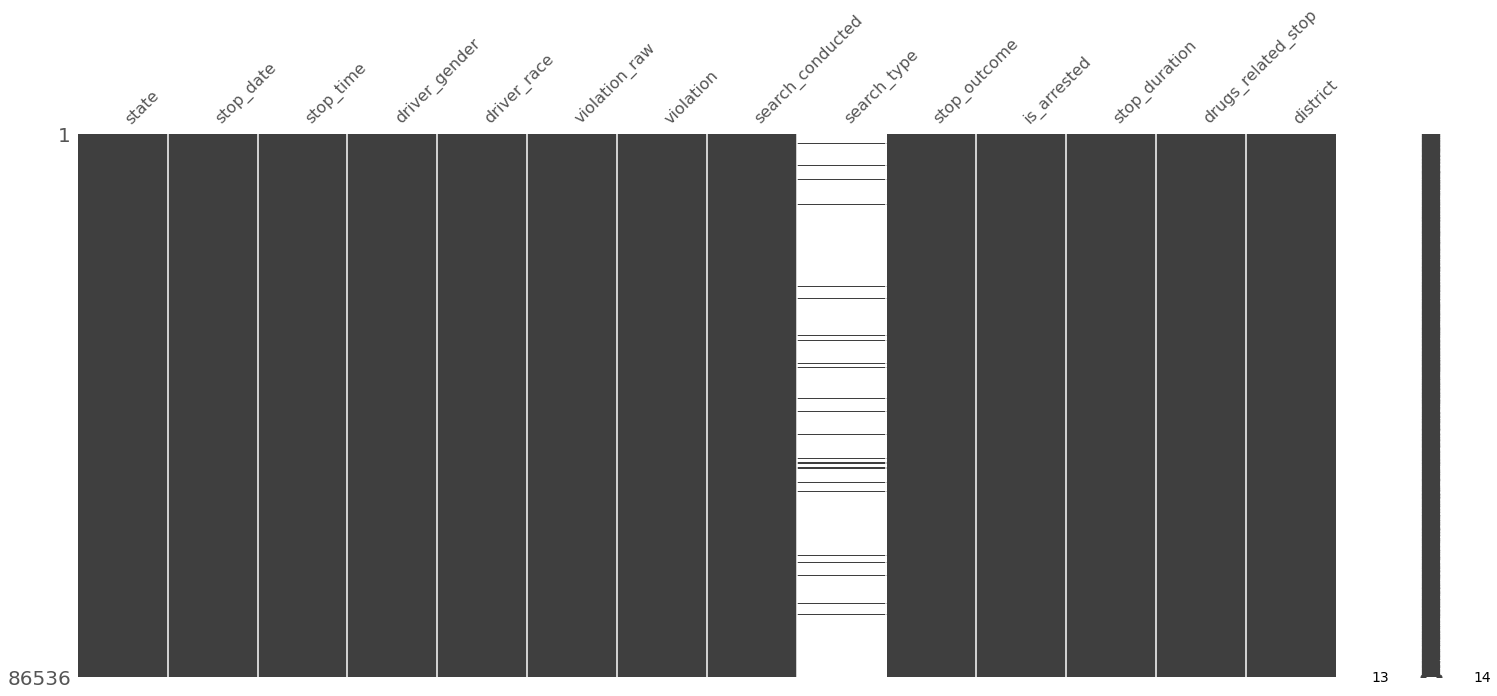

In [35]:
msn.matrix(df)

In [39]:
df["search_type"] = df["search_type"].fillna("did not search")

In [40]:
df.isnull().sum()

stop_date             0
stop_time             0
driver_gender         0
driver_race           0
violation_raw         0
violation             0
search_conducted      0
search_type           0
stop_outcome          0
is_arrested           0
stop_duration         0
drugs_related_stop    0
district              0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86536 entries, 0 to 91740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stop_date           86536 non-null  object
 1   stop_time           86536 non-null  object
 2   driver_gender       86536 non-null  object
 3   driver_race         86536 non-null  object
 4   violation_raw       86536 non-null  object
 5   violation           86536 non-null  object
 6   search_conducted    86536 non-null  bool  
 7   search_type         86536 non-null  object
 8   stop_outcome        86536 non-null  object
 9   is_arrested         86536 non-null  object
 10  stop_duration       86536 non-null  object
 11  drugs_related_stop  86536 non-null  bool  
 12  district            86536 non-null  object
dtypes: bool(2), object(11)
memory usage: 8.1+ MB


In [44]:
com = df["stop_date"].str.cat(df["stop_time"], sep=" ")
df["stop_datetime"]=pd.to_datetime(com)
df.set_index("stop_datetime", inplace=True)
df=df.drop(["stop_date", "stop_time"], axis=1)
df.head()

,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,
2005-01-04 12:55:00,M,White,Equipment/Inspection Violation,Equipment,False,did not search,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,M,White,Speeding,Speeding,False,did not search,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,M,White,Speeding,Speeding,False,did not search,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,M,White,Call for Service,Other,False,did not search,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,F,White,Speeding,Speeding,False,did not search,Citation,False,0-15 Min,False,Zone X3


In [55]:
print(df.violation.value_counts())
print(df.violation.value_counts(normalize=True))

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64
Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64


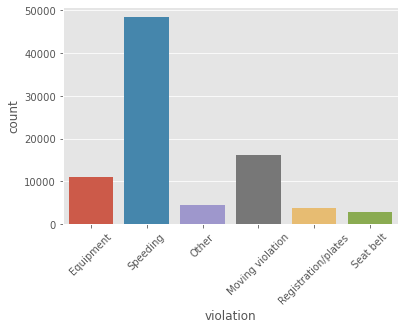

In [54]:
sns.countplot(x='violation', data=df)
plt.xticks(rotation=45)
plt.show()

In [61]:
female = df[df.driver_gender == "F"]
male = df[df.driver_gender == "M"]


print(female.violation.value_counts(normalize=True))
print(male.violation.value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64
Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


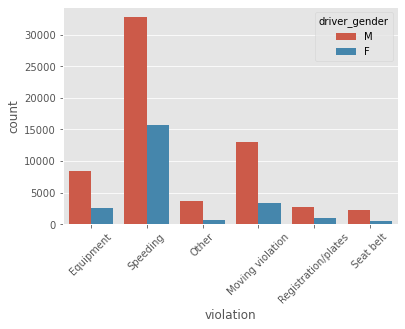

In [59]:
sns.countplot(x='violation', data=df, hue="driver_gender")
plt.xticks(rotation=45)
plt.show()

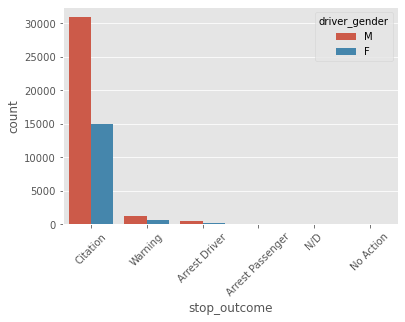

In [66]:
speeding=df[df.violation == "Speeding"]
sns.countplot(x='stop_outcome', data=speeding, hue="driver_gender")
plt.xticks(rotation=45)
plt.show()

In [64]:
female_and_speeding = df[(df.driver_gender=='F') & (df.violation == "Speeding")]
male_and_speeding = df[(df.driver_gender=='M') & (df.violation == "Speeding")]


print(female_and_speeding.stop_outcome.value_counts(normalize=True))
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64
Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


In [67]:
# Check the data type of 'search_conducted'
print(ri.search_conducted.dtype)

# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize=True))

# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

bool
False    0.961785
True     0.038215
Name: search_conducted, dtype: float64
0.0382153092354627


In [68]:
print(ri[ri.driver_gender == "F"].search_conducted.mean())

0.019180617481282074


In [69]:
print(ri[ri.driver_gender == "M"].search_conducted.mean())

0.04542557598546892
